<a href="https://colab.research.google.com/github/wallisonferreira/data-science-tce/blob/main/aula9_ST_decomposicao_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

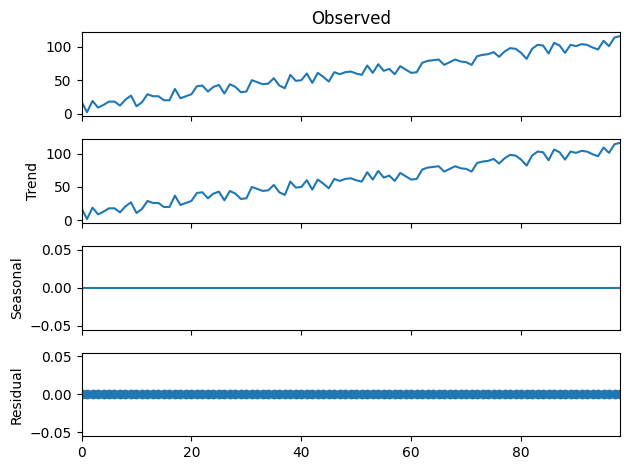

In [1]:
# decomposiçao aditiva
from random import randrange
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

#gerando uma série com crescimento aditivo
serie = [i+randrange(20) for i in range(1,100)]

result = seasonal_decompose(serie, model='additive', period=1)
result.plot()
pyplot.show()

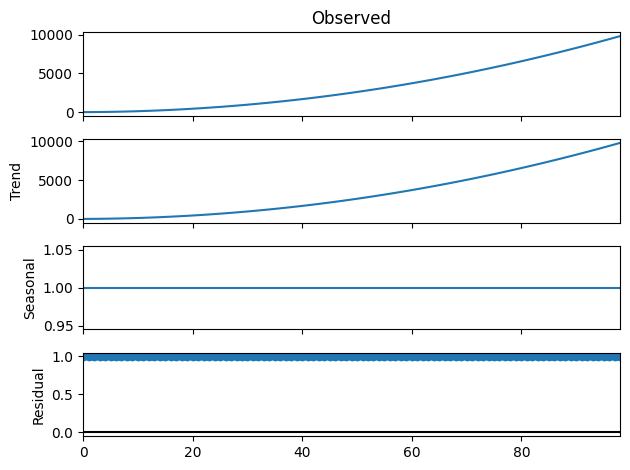

In [2]:
#Decomposição multiplicativa
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

serie = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(serie, model='multiplicative', period=1)
result.plot()
pyplot.show()

<ipython-input-3-5ae7799396c8>:6: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('https://gitlab.com/jdallyson/seriestemporais/-/raw/main/datasets/AirPassengers.csv', header=0, index_col=0,


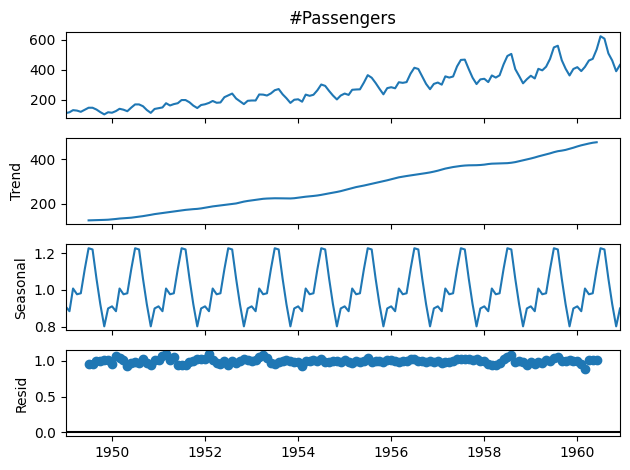

In [3]:
#Decomposição componentes da série airline-passengers
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

series = read_csv('https://gitlab.com/jdallyson/seriestemporais/-/raw/main/datasets/AirPassengers.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
result = seasonal_decompose(series, model='multiplicative')
result.plot()
pyplot.show()

# Nova seção

<ipython-input-4-8fec7009d30b>:6: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  serie = read_csv('https://gitlab.com/jdallyson/seriestemporais/-/raw/main/datasets/daily-min-temperatures.csv', header=0, index_col=0,


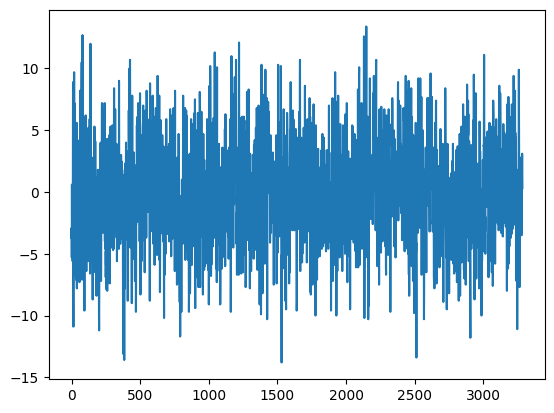

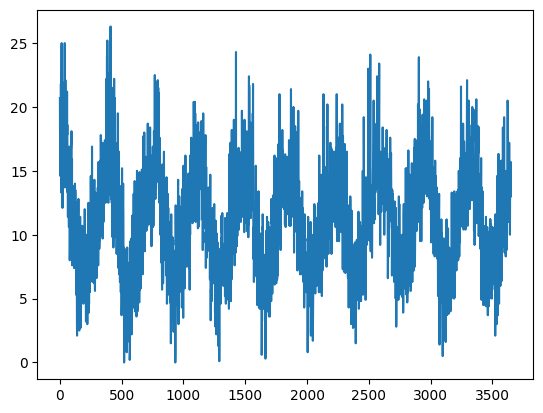

In [4]:
#Removendo Sazonalidade

from pandas import read_csv
from matplotlib import pyplot

serie = read_csv('https://gitlab.com/jdallyson/seriestemporais/-/raw/main/datasets/daily-min-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)

X = serie.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
  valor = X[i] - X[i - days_in_year]
  diff.append(valor)
pyplot.plot(diff)
pyplot.show()
pyplot.plot(X)
pyplot.show()

<ipython-input-5-4516b8af3aa9>:6: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  serie = read_csv('https://gitlab.com/jdallyson/seriestemporais/-/raw/main/datasets/daily-min-temperatures.csv', header=0, index_col=0,


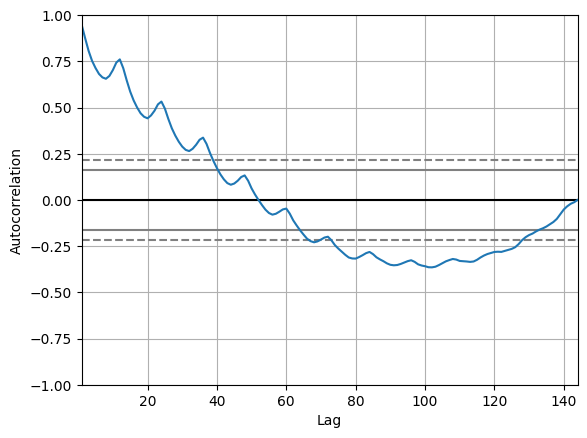

In [5]:
# autocorrelation plot of time series
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

serie = read_csv('https://gitlab.com/jdallyson/seriestemporais/-/raw/main/datasets/daily-min-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)

autocorrelation_plot(series)
pyplot.show()

<ipython-input-6-20b123689cd8>:7: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('https://gitlab.com/jdallyson/seriestemporais/-/raw/main/datasets/daily-min-temperatures.csv', header=0, index_col=0,


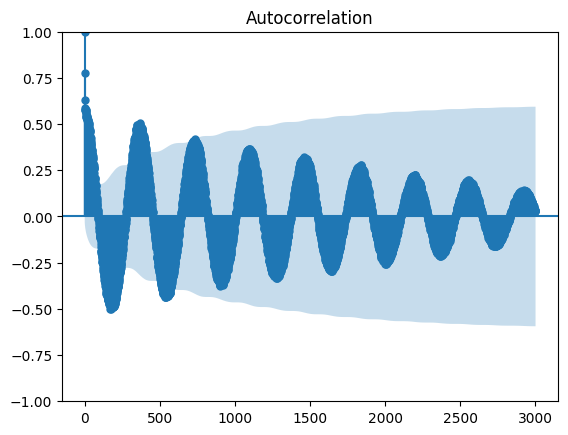

In [6]:
# autocorrelation plot of time series
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf


series = read_csv('https://gitlab.com/jdallyson/seriestemporais/-/raw/main/datasets/daily-min-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)

plot_acf(serie, lags=3000)
pyplot.show()

<ipython-input-7-fce181bb01f2>:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  serie = read_csv('https://gitlab.com/jdallyson/seriestemporais/-/raw/main/datasets/daily-min-temperatures.csv', header=0, index_col=0,


Date
1981-01-31    17.712903
1981-02-28    17.678571
1981-03-31    13.500000
1981-04-30    12.356667
1981-05-31     9.490323
1981-06-30     7.306667
1981-07-31     7.577419
1981-08-31     7.238710
1981-09-30    10.143333
1981-10-31    10.087097
1981-11-30    11.890000
1981-12-31    13.680645
1982-01-31    16.567742
Freq: M, Name: Temp, dtype: float64


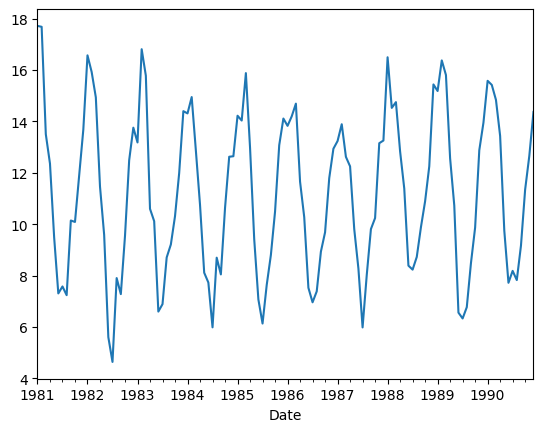

In [7]:
# calculate and plot monthly average
from pandas import read_csv
from matplotlib import pyplot

serie = read_csv('https://gitlab.com/jdallyson/seriestemporais/-/raw/main/datasets/daily-min-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)

resample = serie.resample('M')
monthly_mean = resample.mean()
print(monthly_mean.head(13))
monthly_mean.plot()
pyplot.show()

<ipython-input-12-c905ae68f57b>:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  serie = read_csv('https://gitlab.com/jdallyson/seriestemporais/-/raw/main/datasets/daily-min-temperatures.csv', header=0, index_col=0,


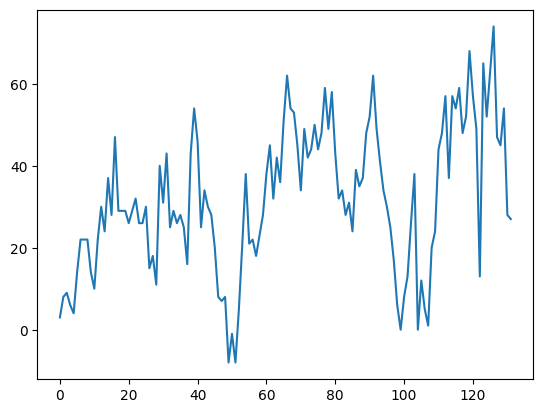

In [ ]:
# deseasonalize monthly data by differencing
from pandas import read_csv
from matplotlib import pyplot

serie = read_csv('https://gitlab.com/jdallyson/seriestemporais/-/raw/main/datasets/daily-min-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)

resample = series.resample('M')
monthly_mean = resample.mean()
X = serie.values
diff = list()
months_in_year = 12
for i in range(months_in_year, len(monthly_mean)):
  value = monthly_mean[i] - monthly_mean[i - months_in_year]
  diff.append(value)
pyplot.plot(diff)
pyplot.show()

<ipython-input-17-ab0dff8ea7f8>:6: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  serie = read_csv('https://gitlab.com/jdallyson/seriestemporais/-/raw/main/datasets/daily-min-temperatures.csv', header=0, index_col=0,


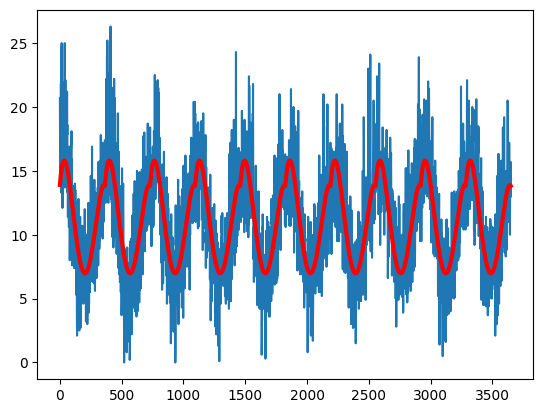

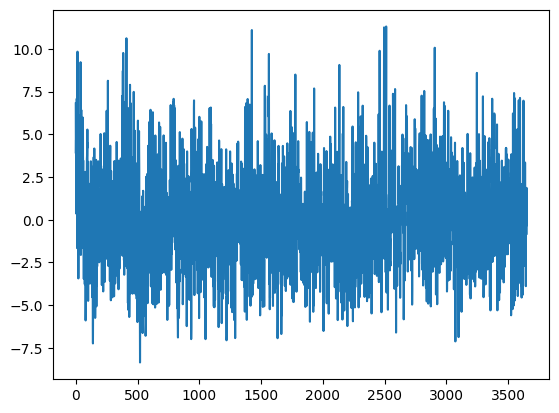

In [ ]:
# Removendo sazonalidade usando o método da diferença com modelo ajustado
from pandas import read_csv
from matplotlib import pyplot
from numpy import polyfit

serie = read_csv('https://gitlab.com/jdallyson/seriestemporais/-/raw/main/datasets/daily-min-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)

# Ajusta um polinomio: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(serie))]
y = serie.values
degree = 4
coef = polyfit(X, y, degree)
#cria acurva
curve = list()
for i in range(len(X)):
  value = coef[-1]
  for d in range(degree):
    value += X[i]**(degree-d) * coef[d]
  curve.append(value)
# cria serie com sazonalidade ajustada
values = serie.values
diff = list()
for i in range(len(values)):
  value = values[i] - curve[i]
  diff.append(value)
# plot curva sobre os dados originais
pyplot.plot(serie.values)
pyplot.plot(curve, color='red', linewidth=3)
pyplot.show()
pyplot.plot(diff)
pyplot.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


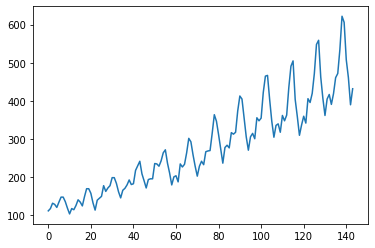

mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


In [ ]:
# identificando estacionariedade
# calculate statistics of partitioned time series data
from pandas import read_csv
from matplotlib import pyplot

#series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series = read_csv('AirPassengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

X = series.values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
pyplot.plot(X)
pyplot.show()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

<ipython-input-18-683121efe9ec>:6: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('https://gitlab.com/jdallyson/seriestemporais/-/raw/main/datasets/AirPassengers.csv', header=0, index_col=0,


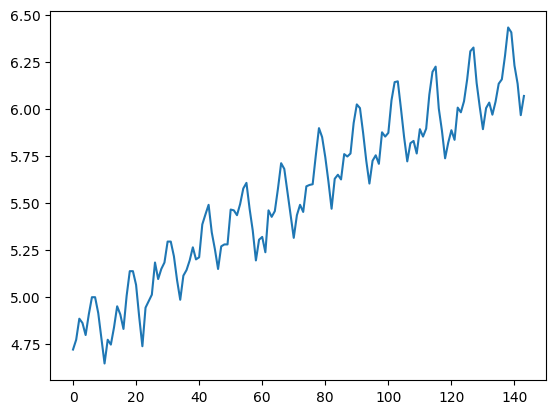

ADF Statistic: -1.717017
p-value: 0.422367
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [ ]:
# calculate stationarity test of log transformed time series data
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
from numpy import log

series = read_csv('https://gitlab.com/jdallyson/seriestemporais/-/raw/main/datasets/AirPassengers.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)

X = series.values
X = log(X)
result = adfuller(X)
pyplot.plot(X)
pyplot.show()
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))